In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
F = 5
L = 4

## Excercise 1 -  Generated Quantities Block

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:compiling stan file /home/szut/DA/lab2/code_1.stan to exe file /home/szut/DA/lab2/code_1
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/szut/DA/lab2/code_1.hpp /home/szut/DA/lab2/code_1.stan
Warning in '/home/szut/DA/lab2/code_1.stan', line 7, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_m

In [4]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


(array([[119.,  89.,  94.,  93.,  85.,  89.,  77.,  56.,  53.,  30.,  41.,
          28.,  28.,  29.,  15.,  18.,  18.,  11.,   5.,   2.,   9.,   3.,
           2.,   2.,   2.,   0.,   0.,   1.,   1.,   0.],
        [117.,  90.,  92.,  92.,  95.,  79.,  72.,  54.,  58.,  43.,  35.,
          32.,  22.,  23.,  24.,  21.,  14.,   9.,   4.,   4.,   6.,   8.,
           2.,   1.,   1.,   0.,   1.,   0.,   1.,   0.],
        [120.,  93.,  87.,  97.,  95.,  72.,  76.,  55.,  56.,  47.,  29.,
          29.,  25.,  18.,  28.,  20.,  17.,  10.,   1.,   5.,   7.,   5.,
           4.,   2.,   0.,   0.,   0.,   0.,   1.,   1.],
        [117.,  98.,  87.,  98.,  92.,  70.,  72.,  65.,  53.,  31.,  45.,
          30.,  27.,  28.,  15.,  18.,  13.,  14.,  10.,   2.,   6.,   3.,
           4.,   0.,   0.,   0.,   0.,   1.,   1.,   0.],
        [119.,  89.,  93.,  92.,  77.,  89.,  73.,  61.,  63.,  33.,  33.,
          33.,  27.,  31.,  19.,  15.,  12.,  10.,   6.,   7.,   5.,   7.,
           1.,   1

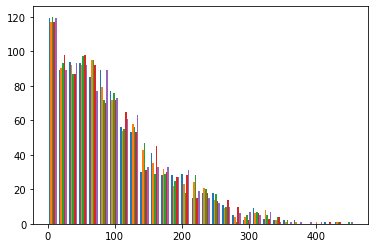

In [7]:
y_sim = samples.stan_variable('y_sim')
plt.hist(y_sim, bins=30)

In [15]:
df_ysim = pd.DataFrame(data=y_sim)
df_ysim

,0,1,2,3,4
0,56.0,63.0,46.0,57.0,59.0
1,136.0,148.0,148.0,143.0,159.0
2,29.0,39.0,23.0,36.0,24.0
3,63.0,71.0,73.0,79.0,64.0
4,30.0,28.0,23.0,26.0,26.0
...,...,...,...,...,...
995,90.0,76.0,73.0,73.0,78.0
996,241.0,271.0,282.0,268.0,247.0
997,62.0,48.0,65.0,50.0,62.0
998,226.0,233.0,227.0,228.0,227.0


(array([111.,  87.,  82.,  99.,  84.,  69.,  77.,  58.,  58.,  41.,  39.,
         32.,  33.,  21.,  21.,  22.,  13.,  15.,  12.,   3.,   4.,   4.,
          8.,   1.,   2.,   2.,   0.,   0.,   0.,   2.]),
 array([4.00663000e-02, 1.43719308e+01, 2.87037952e+01, 4.30356597e+01,
        5.73675241e+01, 7.16993886e+01, 8.60312530e+01, 1.00363117e+02,
        1.14694982e+02, 1.29026846e+02, 1.43358711e+02, 1.57690575e+02,
        1.72022440e+02, 1.86354304e+02, 2.00686169e+02, 2.15018033e+02,
        2.29349898e+02, 2.43681762e+02, 2.58013627e+02, 2.72345491e+02,
        2.86677355e+02, 3.01009220e+02, 3.15341084e+02, 3.29672949e+02,
        3.44004813e+02, 3.58336678e+02, 3.72668542e+02, 3.87000407e+02,
        4.01332271e+02, 4.15664136e+02, 4.29996000e+02]),
 <BarContainer object of 30 artists>)

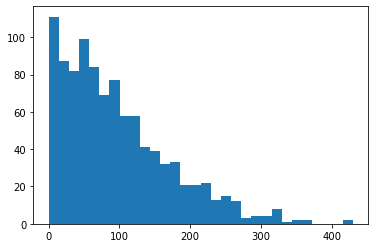

In [10]:
lambd = samples.stan_variable('lambda')
plt.hist(lambd, bins=30)

In [16]:
df_lambd = pd.DataFrame(data=lambd)
df_lambd

,0
0,54.5085
1,142.2660
2,30.2121
3,65.5429
4,28.3051
...,...
995,79.9807
996,259.7240
997,59.8436
998,233.5230


## Excercise 2 - Constraints on the data 

In [3]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/szut/DA/lab2/code_2.stan', line 10, column 4 to column 25)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/szut/DA/lab2/code_2', 'id=1', 'random', 'seed=40460', 'data', 'file=/tmp/tmpwfdho7kf/nr4qt6kr.json', 'output', 'file=/tmp/tmpwfdho7kf/code_2-20220315203030_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpwfdho7kf/code_2-20220315203030_1.csv
 console_msgs (if any):
	/tmp/tmpwfdho7kf/code_2-20220315203030_0-stdout.txt

In [4]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/szut/DA/lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/szut/DA/lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/szut/DA/lab2/code_3.stan', line 3, column 4 to column 31)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/szut/DA/lab2/code_3.stan', line 3, column 4 to column 31)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/szut/DA/lab2/code_3', 'id=1', 'random', 'seed=12067', 'data', 'file=/tmp/tmpwfdho7kf/a1o5cjnf.json', 'output', 'file=/tmp/tmpwfdho7kf/code_3-20220315203246_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpwfdho7kf/code_3-20220315203246_1.csv
 console_msgs (if any):
	/tmp/tmpwfdho7kf/code_3-20220315203246_0-stdout.txt

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [52]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/szut/DA/lab2/samples/code_4-20220309120238_1.csv, /home/szut/DA/lab2/samples/code_4-20220309120238_2.csv, /home/szut/DA/lab2/samples/code_4-20220309120238_3.csv, /home/szut/DA/lab2/samples/code_4-20220309120238_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9400 of 24000 (39.17%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

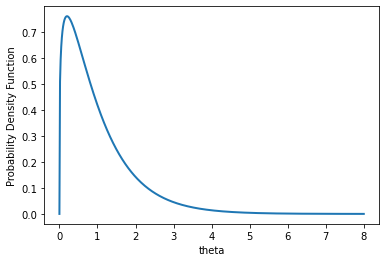

(array([529., 799., 816., 830., 829., 845., 867., 780., 762., 768., 693.,
        799., 691., 705., 640., 627., 583., 544., 584., 518., 472., 459.,
        438., 398., 399., 391., 387., 333., 362., 304., 314., 275., 281.,
        265., 255., 230., 219., 227., 197., 211., 178., 189., 149., 128.,
        152., 141., 136., 104., 107., 101., 106., 111.,  91., 108.,  99.,
         88.,  84.,  77.,  72.,  73.,  52.,  66.,  58.,  45.,  51.,  54.,
         42.,  38.,  42.,  32.,  22.,  36.,  33.,  26.,  30.,  28.,  19.,
         23.,  22.,  16.,  16.,  20.,  14.,  13.,  18.,  11.,  18.,  17.,
         10.,   9.,  11.,   6.,   6.,  10.,   7.,  12.,   2.,   8.,   9.,
         10.,   7.,   4.,   7.,   0.,   5.,   6.,   9.,   6.,   9.,   1.,
          6.,   1.,   3.,   5.,   2.,   0.,   4.,   5.,   3.,   5.,   1.,
          0.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,   2.,   4.,   1.,
          0.,   0.,   1.,   1.,   0.,   2.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 

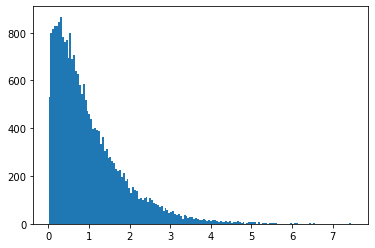

In [53]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)



plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
theta1 = out_gamma1.stan_variable('theta')
plt.hist(theta1, bins=160)

### Constrained parameter

In [49]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


'Processing csv files: /home/szut/DA/lab2/samples/code_5-20220309120113_1.csv, /home/szut/DA/lab2/samples/code_5-20220309120113_2.csv, /home/szut/DA/lab2/samples/code_5-20220309120113_3.csv, /home/szut/DA/lab2/samples/code_5-20220309120113_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

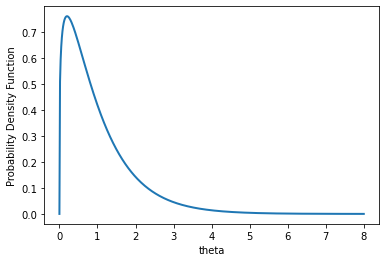

(array([634., 856., 850., 933., 943., 889., 854., 805., 786., 804., 792.,
        803., 727., 735., 660., 615., 576., 589., 498., 505., 481., 448.,
        436., 457., 399., 362., 344., 358., 338., 280., 270., 261., 270.,
        261., 241., 215., 206., 185., 187., 173., 187., 159., 169., 156.,
        126., 122., 127., 102.,  83., 106., 104.,  96.,  88.,  74.,  74.,
         47.,  69.,  75.,  65.,  39.,  61.,  46.,  43.,  52.,  40.,  40.,
         38.,  31.,  29.,  37.,  27.,  28.,  17.,  23.,  20.,  21.,  18.,
         19.,  15.,  11.,  18.,  10.,  11.,  17.,  12.,  10.,  14.,  16.,
         19.,   5.,   7.,  15.,   6.,   7.,   8.,   7.,  13.,   2.,   5.,
          5.,   3.,   6.,   4.,  11.,   5.,   7.,   4.,   2.,   2.,   2.,
          3.,   0.,   1.,   3.,   3.,   0.,   0.,   4.,   2.,   1.,   2.,
          2.,   2.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   2.,   1.,
          2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1., 

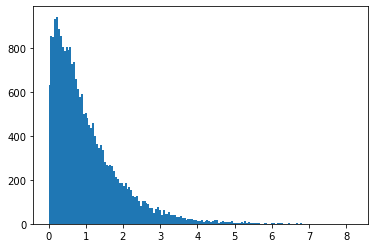

In [51]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
theta2 = out_gamma2.stan_variable('theta')
plt.hist(theta2, bins=160)

## Excercise 4 -  Selection of parameters using equation solving



In [5]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 5 # number of letters in the first name
L = 4 # number of letters in the last name
y0 = 2 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
tunes.stan_variable("sigma")
# From stdout: std dev = 1.74701

array([1.74701])

## Excercise 5 - different methods of defining models


In [10]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 24121988 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)







chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


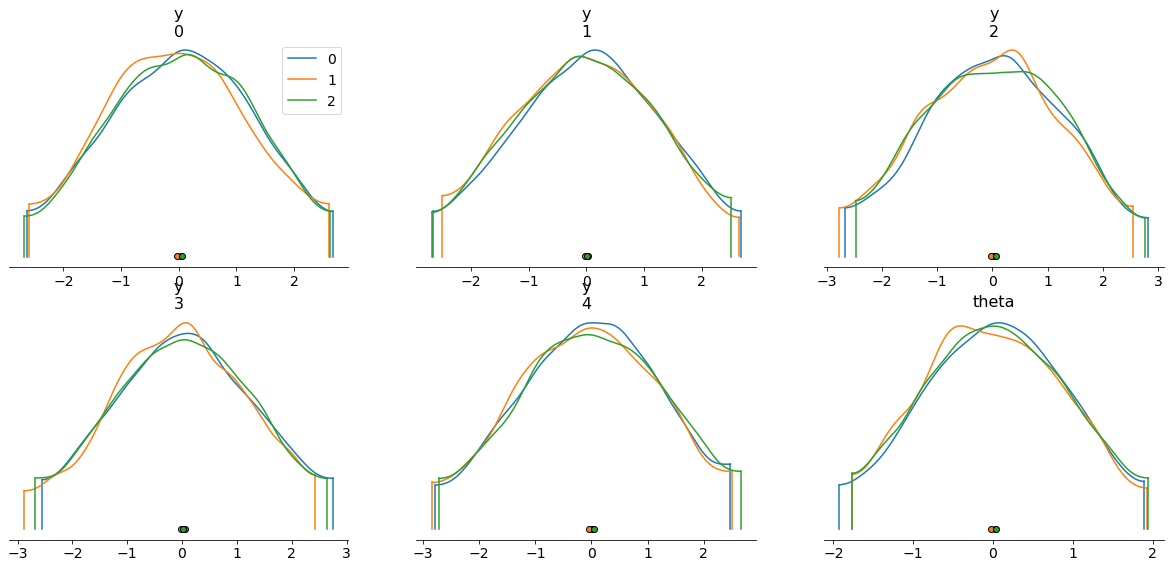

In [11]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


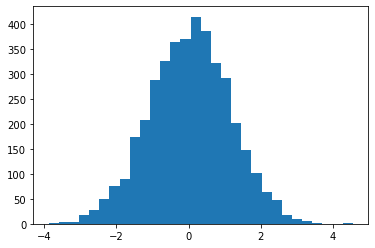

In [16]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variableŌ

plt.hist(mean_of_y.stan_variable('mean_y'), bins=30)
plt.show()